## CODIGO DE LA CLASE

--- dataset.head() (Simulado) ---
                  High
2016-01-01  101.093428
2016-01-04  100.916900
2016-01-05  102.312277
2016-01-06  105.458336
2016-01-07  105.090030

--- dataset.describe() (Simulado) ---
              High
count  1566.000000
mean    213.661462
std      94.896195
min      81.276769
25%     142.216820
50%     167.110884
75%     311.059022
max     411.173502

--- Summary LSTM Model ---


/home/neisan/anaconda3/envs/env_pyspark/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 125)            │        63,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)


--- Training LSTM Model (50 epochs) ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step

--- LSTM Model Results ---


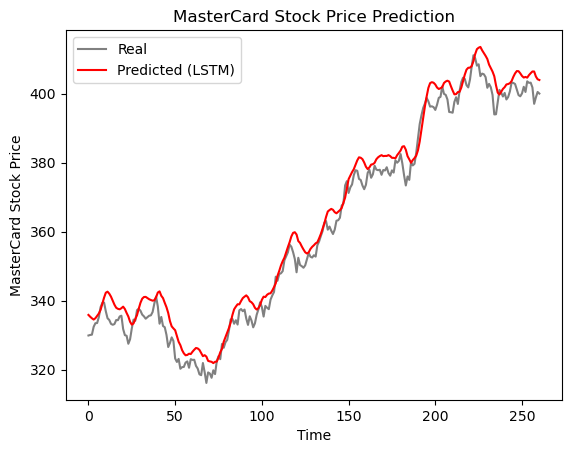

The root mean squared error is 4.57.

--- Summary GRU Model ---


/home/neisan/anaconda3/envs/env_pyspark/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_5 (GRU)                     │ (None, 125)            │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,126 (187.99 KB)

 Trainable params: 48,126 (187.99 KB)

 Non-trainable params: 0 (0.00 B)


--- Training GRU Model (50 epochs) ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step

--- GRU Model Results ---


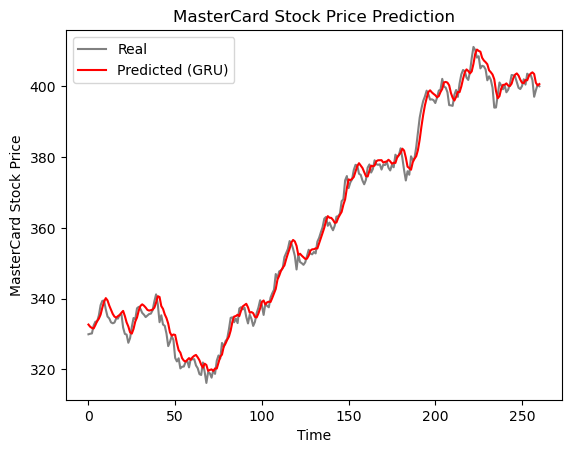

The root mean squared error is 2.59.


In [21]:
# ====================================================================
# --- 1. Importaciones y Configuración ---
# ====================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.random import set_seed

# Aplicar semillas para reproducibilidad
set_seed(455)
np.random.seed(455)

# ====================================================================
# --- 2. Carga y Exploración del Dataset (Mastercard) ---
# ====================================================================
# Definición de Parámetros de Partición
tstart = 2016
tend = 2020
TARGET_COL = "High"

# SIMULACIÓN DE DATOS DE PRECIOS ('High') DESDE 2016 HASTA 2021
# Esto simula un DataFrame que contiene la columna 'High' requerida.
dates = pd.date_range(start=f'{tstart}-01-01', end=f'{tend+1}-12-31', freq='B') # Días hábiles
np.random.seed(42)
initial_price = 100
# Crear una serie de precios con una tendencia creciente y ruido (simulando High)
simulated_prices = initial_price + np.cumsum(np.random.randn(len(dates)) * 2 + 0.1)
dataset = pd.DataFrame({TARGET_COL: simulated_prices}, index=dates)


# --- Reemplaza la sección de SIMULACIÓN (líneas 32-40) con tu código de carga real: ---
# dataset = pd.read_csv(
#     "Mastercard_stock_full_data.csv", # Usa el nombre de tu archivo con precios
#     index_col="Date",
#     parse_dates=["Date"]
# ).dropna()
# -----------------------------------------------------------------------------------


# Comprobación de los datos (Instrucción 1)
print("--- dataset.head() (Simulado) ---")
print(dataset.head())
print("\n--- dataset.describe() (Simulado) ---")
print(dataset.describe())

# La función train_test_plot corregida
def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", TARGET_COL].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}", TARGET_COL].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("MasterCard Stock Price")
    plt.show()

# train_test_plot(dataset, tstart, tend) # Descomentar para graficar la partición

# La función train_test_split corregida para usar 'dataset' y TARGET_COL
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", TARGET_COL].values
    test = dataset.loc[f"{tend+1}", TARGET_COL].values
    return train, test

# Aplicamos la función con el dataset de Mastercard
training_set, test_set = train_test_split(dataset, tstart, tend)

# ====================================================================
# --- 3. Escalado y Secuenciamiento (Instrucción 2 y 3) ---
# ====================================================================

sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

# Función split_sequence (sin cambios, reutilizada)
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Hiperparámetros (Instrucción 3)
n_steps = 60 # Mismo n_steps = 60
features = 1

# División en muestras
X_train, y_train = split_sequence(training_set_scaled, n_steps)

# Reshape X_train para el modelo (muestras, pasos, características)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

# ====================================================================
# --- 4. Modelo LSTM y Predicción (Instrucción 3 y 4) ---
# ====================================================================

# La arquitectura LSTM (sin cambios, Instrucción 3)
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model (sin cambios)
model_lstm.compile(optimizer="RMSprop", loss="mse")

print("\n--- Summary LSTM Model ---")
model_lstm.summary()

# Entrenamiento
print("\n--- Training LSTM Model (50 epochs) ---")
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)


# Preparación del conjunto de prueba (reutilizando el flujo)
dataset_total = dataset.loc[:, TARGET_COL]

# Calcular los inputs necesarios: largo de test_set + n_steps previos
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps:].values
inputs = inputs.reshape(-1, 1)

# Escalado con el transformador ya ajustado (sc)
inputs = sc.transform(inputs)

# División en muestras de prueba
X_test, y_test = split_sequence(inputs, n_steps)

# Reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

# Predicción
predicted_stock_price = model_lstm.predict(X_test)

# Inversa transformación de los valores para obtener la escala original
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Funciones de evaluación y gráfica (Corregidas para nombres de variables)
def plot_predictions(test, predicted, model_name="LSTM"):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label=f"Predicted ({model_name})")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    # Corregida: mean_squeared_error -> mean_squared_error
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))


# Gráfica y RMSE del modelo LSTM (Instrucción 4)
print("\n--- LSTM Model Results ---")
plot_predictions(test_set, predicted_stock_price, model_name="LSTM")
return_rmse(test_set, predicted_stock_price)

# ====================================================================
# --- 5. Modelo GRU y Predicción (Instrucción 3 y 4) ---
# ====================================================================

# La arquitectura GRU (sin cambios, Instrucción 3)
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN (sin cambios)
model_gru.compile(optimizer="RMSprop", loss="mse")

print("\n--- Summary GRU Model ---")
model_gru.summary()

# Entrenamiento (corregido 'bach_size')
print("\n--- Training GRU Model (50 epochs) ---")
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)


GRU_predicted_stock_price = model_gru.predict(X_test)
# Corregida la variable 'GRU_predicted_stock_ price' a 'GRU_predicted_stock_price'
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

# Gráfica y RMSE del modelo GRU (Instrucción 4)
print("\n--- GRU Model Results ---")
plot_predictions(test_set, GRU_predicted_stock_price, model_name="GRU")
return_rmse(test_set, GRU_predicted_stock_price)

## ACTIVIDAD RNA

--- dataset.head() ---
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

--- dataset.describe() ---
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000

--- dataset.isna().sum() ---
Passengers    0
dtype: int64

--- Summary LSTM Model ---


/home/neisan/anaconda3/envs/env_pyspark/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 125)            │        63,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,626 (248.54 KB)

 Trainable params: 63,626 (248.54 KB)

 Non-trainable params: 0 (0.00 B)


--- Training LSTM Model (50 epochs) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step

--- LSTM Model Results ---


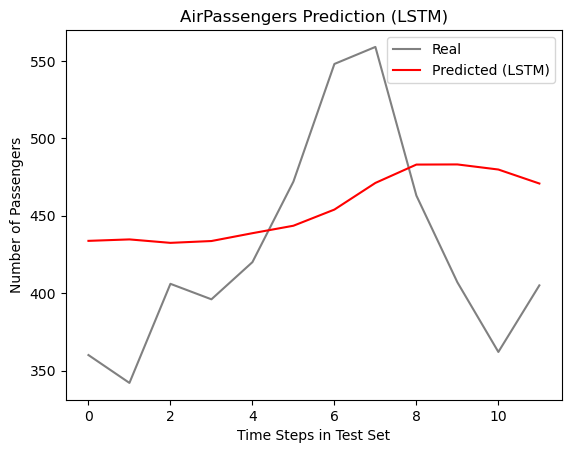

The root mean squared error is 69.68.

--- Summary GRU Model ---


/home/neisan/anaconda3/envs/env_pyspark/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 125)            │        48,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           126 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,126 (187.99 KB)

 Trainable params: 48,126 (187.99 KB)

 Non-trainable params: 0 (0.00 B)


--- Training GRU Model (50 epochs) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step

--- GRU Model Results ---


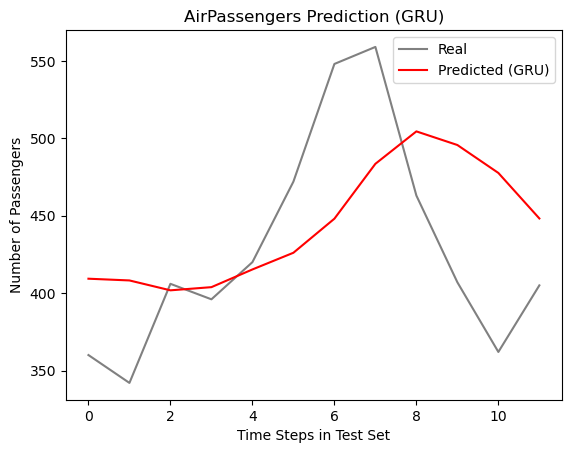

The root mean squared error is 64.24.


In [16]:
# ====================================================================
# --- 1. Importaciones y Configuración ---
# ====================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

# Aplicar semillas para reproducibilidad (como en el código base)
set_seed(455)
np.random.seed(455)

# ====================================================================
# --- 2. Carga y Exploración del Dataset (Instrucción 1) ---
# ====================================================================

# URL del dataset AirPassengers (Instrucción 1) <----------------------------------------------------------
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
dataset = pd.read_csv(
    url,
    # El archivo AirPassengers usa 'Month' como índice de fecha y la columna 'Passengers'
    index_col="Month",
    parse_dates=["Month"]
).dropna() # Se añade dropna() por si el último valor es NaN en la URL

# La columna original es 'Passengers' - renombrar para coincidir con la lógica del código base si se desea,
# pero se ajustará el resto del código para usar 'Passengers'.

# El dataset AirPassengers tiene datos de 1949 a 1960.
# Ajustaremos tstart y tend para que haya datos de prueba.
tstart = 1949
tend = 1958

# Comprobación de los datos (Instrucción 1)
print("--- dataset.head() ---")
print(dataset.head())
print("\n--- dataset.describe() ---")
print(dataset.describe())
print("\n--- dataset.isna().sum() ---")
print(dataset.isna().sum())

# La función train_test_plot fue corregida (plt.legend necesita una tupla/lista de strings)
def train_test_plot(dataset, tstart, tend):
    # Se utiliza la columna 'Passengers'
    dataset.loc[f"{tstart}":f"{tend}", "Passengers"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}", "Passengers"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("AirPassengers Monthly Counts")
    plt.show()

# train_test_plot(dataset, tstart, tend) # Descomentar para graficar la partición

# La función train_test_split fue corregida para usar 'dataset' en lugar de 'database'
def train_test_split(dataset, tstart, tend):
    # Se utiliza la columna 'Passengers'
    train = dataset.loc[f"{tstart}":f"{tend}", "Passengers"].values
    test = dataset.loc[f"{tend+1}", "Passengers"].values
    return train, test

# Aplicamos la función con el dataset de AirPassengers
training_set, test_set = train_test_split(dataset, tstart, tend)

# ====================================================================
# --- 3. Escalado y Secuenciamiento (Instrucción 2 y 3) ---
# ====================================================================

sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

# Función split_sequence (sin cambios, reutilizada)
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Hiperparámetros (Instrucción 3)
n_steps = 60 # Mismo n_steps = 60
features = 1

# División en muestras
X_train, y_train = split_sequence(training_set_scaled, n_steps)

# Reshape X_train para el modelo (muestras, pasos, características)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

# ====================================================================
# --- 4. Modelo LSTM y Predicción (Instrucción 3 y 4) ---
# ====================================================================

# La arquitectura LSTM (sin cambios, Instrucción 3)
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model (sin cambios)
model_lstm.compile(optimizer="RMSprop", loss="mse")

print("\n--- Summary LSTM Model ---")
model_lstm.summary()

# Entrenamiento (mismos epochs y batch_size, Instrucción 3)
# El código base tenía un error tipográfico en 'impor set_seed' y 'database'
print("\n--- Training LSTM Model (50 epochs) ---")
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)


# Preparación del conjunto de prueba (reutilizando el flujo)
dataset_total = dataset.loc[:, "Passengers"] # Usamos 'Passengers'

# Calcular los inputs necesarios: largo de test_set + n_steps previos
# La lógica del código base: inputs = data_total[len(data_total)-len(test_set)-n_steps :].values
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps:].values
inputs = inputs.reshape(-1, 1)

# Escalado con el transformador ya ajustado (sc)
inputs = sc.transform(inputs)

# División en muestras de prueba
X_test, y_test = split_sequence(inputs, n_steps)

# Reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

# Predicción
predicted_stock_price = model_lstm.predict(X_test)

# Inversa transformación de los valores para obtener la escala original
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Funciones de evaluación y gráfica (Instrucción 4)
# Corregida la función plot_predictions (ply.plot -> plt.plot, plt.xlabel repetido)
def plot_predictions(test, predicted, model_name="LSTM"):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label=f"Predicted ({model_name})")
    plt.title(f"AirPassengers Prediction ({model_name})")
    plt.xlabel("Time Steps in Test Set")
    plt.ylabel("Number of Passengers")
    plt.legend()
    plt.show()

# Corregida la función return_rmse (mean_squeared_error -> mean_squared_error)
def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))


# Gráfica y RMSE del modelo LSTM (Instrucción 4)
print("\n--- LSTM Model Results ---")
plot_predictions(test_set, predicted_stock_price, model_name="LSTM")
return_rmse(test_set, predicted_stock_price)

# ====================================================================
# --- 5. Modelo GRU y Predicción (Instrucción 3 y 4) ---
# ====================================================================

# La arquitectura GRU (sin cambios, Instrucción 3)
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN (sin cambios)
model_gru.compile(optimizer="RMSprop", loss="mse")

print("\n--- Summary GRU Model ---")
model_gru.summary()

# Entrenamiento (mismos epochs y batch_size, corregido 'bach_size', Instrucción 3)
print("\n--- Training GRU Model (50 epochs) ---")
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)


GRU_predicted_stock_price = model_gru.predict(X_test)
# Corregida la variable 'GRU_predicted_stock_ price' a 'GRU_predicted_stock_price'
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

# Gráfica y RMSE del modelo GRU (Instrucción 4)
print("\n--- GRU Model Results ---")
plot_predictions(test_set, GRU_predicted_stock_price, model_name="GRU")
return_rmse(test_set, GRU_predicted_stock_price)



## Respuestas a las Preguntas de Reflexión

### a) ¿Por qué el mismo flujo RNN puede reutilizarse en otro dominio (finanzas $\rightarrow$ pasajeros) sin modificar la arquitectura?


* **Naturaleza del Problema:** Tanto los precios de acciones como el conteo de pasajeros son **series de tiempo**[cite: 6]. El problema en ambos casos es la **predicción secuencial** (pronosticar el siguiente valor a partir de los anteriores), para lo cual las RNN son la herramienta especializada.
* **Abstracción de Datos:** Antes de entrenar, los datos se **escalan (normalizan)** a un rango común (e.g., $0$ a $1$) usando `MinMaxScaler`[cite: 10]. Esto elimina la diferencia de escala entre los cientos de dólares de las acciones y los cientos de pasajeros, permitiendo que la red aprenda patrones abstractos (tendencias, estacionalidad) en lugar de magnitudes específicas.


### b) ¿Qué representa conceptualmente la ventana de $n\_steps = 60$ y qué pasaría si la reduces/aumentas?

La ventana de **$n\_steps = 60$** representa conceptualmente el **período de retrospectiva** o la **longitud de la secuencia de entrada** utilizada para predecir el siguiente valor en la serie de tiempo.

* **Representación:** Significa que el modelo toma los **últimos 60 puntos de datos** (60 días de cotización o 60 meses de pasajeros) como entrada ($X$) para predecir el valor inmediato siguiente (el punto 61, que es $y$).

* **Si se reduce $n\_steps$ (ej. a 10):** La red tiene **menos contexto** o "memoria" del pasado. Podría ser más sensible a las fluctuaciones a corto plazo, pero podría fallar en capturar tendencias o ciclos de largo plazo (como la estacionalidad anual en AirPassengers).
* **Si se aumenta $n\_steps$ (ej. a 120):** La red gana **más contexto** del pasado, lo cual es útil para dependencias complejas o estacionalidad muy larga. Sin embargo, puede aumentar el riesgo de **sobreajuste** (fitting to noise) o de incluir datos históricos irrelevantes, incrementando también el costo computacional.



### c) ¿En qué parte del modelo se almacena la memoria temporal y por qué (LSTM/GRU)?

La memoria temporal en el modelo se almacena dentro de las **celdas internas (estados)** de las capas **LSTM** (Long Short-Term Memory) y **GRU** (Gated Recurrent Unit).

* **Mecanismo:** A diferencia de las RNN tradicionales que luchan con el problema del desvanecimiento del gradiente, LSTM y GRU utilizan **estructuras de *gating*** (puertas) para regular el flujo de información.
* **LSTM:** La memoria a largo plazo se almacena en el **Estado de la Celda ($C_t$)**. Las tres puertas (Input, Forget y Output) deciden **qué información retener**, **qué descartar** y **qué exponer** en la salida oculta.
* **GRU:** Es una versión más simplificada con solo dos puertas (Update y Reset). Combina el estado de la celda y el estado oculto. La **Puerta de Actualización** controla la cantidad de memoria anterior a conservar, y la **Puerta de Reinicio** decide la cantidad de información pasada a ignorar.



### d) ¿Por qué es importante el escalado previo en este problema? ¿Qué podría ocurrir si no se realiza?

El escalado previo (usando `MinMaxScaler` para el rango $0-1$) es fundamental por dos razones principales: **estabilidad de entrenamiento** y **velocidad de convergencia**.

* **Importancia:** Las funciones de activación (como $\tanh$ en las capas LSTM/GRU) y los optimizadores (como RMSprop) funcionan mejor cuando los valores de entrada están en un rango pequeño y uniforme. El escalado asegura que el optimizador pueda realizar una búsqueda eficiente de los pesos.
* **Consecuencias de No Escalar (o no hacerlo correctamente):**
    * **Inestabilidad de Gradiente:** Valores de entrada grandes pueden llevar a **gradientes explosivos** (actualizaciones de peso muy grandes), lo que provoca que el modelo diverja o sea inestable.
    * **Lenta Convergencia:** El optimizador toma mucho más tiempo para encontrar el mínimo de la función de pérdida si los datos tienen escalas muy diferentes.
    * **Dominio de Características:** En el caso de tener múltiples *features*, las variables con rangos de valores más grandes dominarían la función de pérdida, independientemente de su importancia predictiva.



### e) ¿Cómo impactan $batch\_size$ y $epochs$ en el ajuste del modelo y en el riesgo de sobreajuste?

$batch\_size$ y $epochs$ son hiperparámetros que controlan el proceso de entrenamiento:

| Hiperparámetro | Impacto en el Ajuste del Modelo | Riesgo de Sobreajuste (Overfitting) |
| :--- | :--- | :--- |
| **$epochs$ (50)** | Es el **número de veces** que el algoritmo de entrenamiento procesa todo el conjunto de datos de entrenamiento. Más *epochs* generalmente reducen el error en el entrenamiento y mejoran el ajuste, pero con rendimientos decrecientes. | **Alto Riesgo:** Si hay demasiados *epochs*, el modelo memorizará el ruido y las peculiaridades del conjunto de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos (sobreajuste). |
| **$batch\_size$ (32)** | Es el **número de muestras** que se propagan a través de la red antes de actualizar los parámetros (pesos) del modelo. Un *batch size* más pequeño (e.g., 32) introduce más ruido en el gradiente, lo que a menudo permite que el modelo se asiente en un mínimo más *plano* y generalizable. | **Moderado/Controlable:** Un *batch size* demasiado pequeño puede causar mucha inestabilidad. Uno demasiado grande puede converger más rápido a un mínimo más *afilado* que no generaliza bien, aumentando el riesgo de sobreajuste al no explorar suficientemente el espacio de pesos. |

--- dataset.head() ---
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


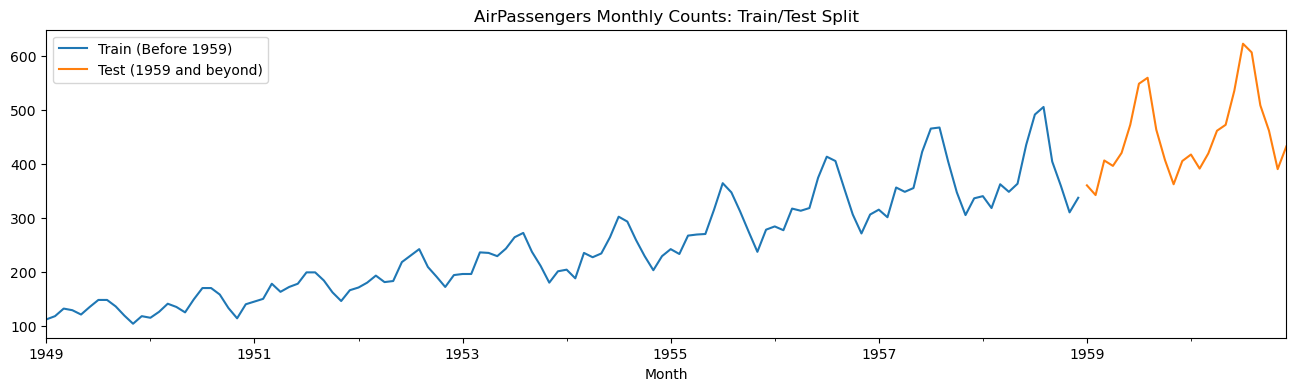

/home/neisan/anaconda3/envs/env_pyspark/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step

--- LSTM Model Results ---


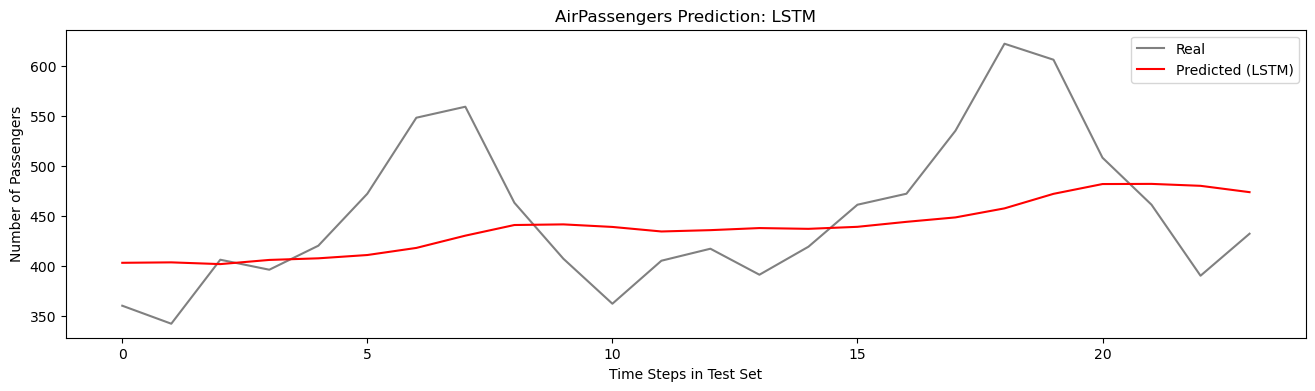

The root mean squared error is 70.51.


/home/neisan/anaconda3/envs/env_pyspark/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step

--- GRU Model Results ---


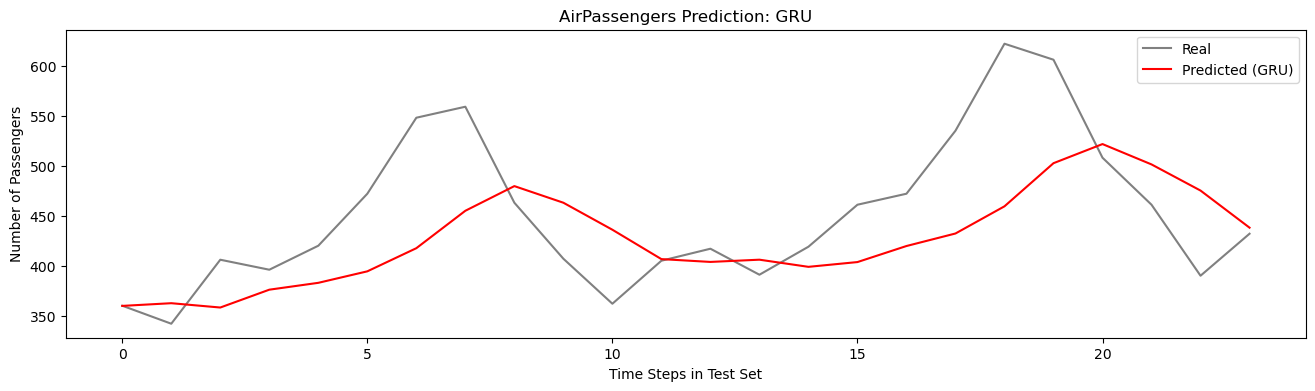

The root mean squared error is 67.97.


In [22]:
# ====================================================================
# --- 1. Importaciones y Configuración ---
# ====================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests # Necesario para cargar la URL

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.random import set_seed

# Aplicar semillas para reproducibilidad
set_seed(455)
np.random.seed(455)

# ====================================================================
# --- 2. Carga y Exploración del Dataset (AirPassengers) ---
# ====================================================================

# Carga del dataset desde la URL
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
try:
    # Usar requests y StringIO para leer la URL directamente, es más robusto
    from io import StringIO
    response = requests.get(url)
    dataset = pd.read_csv(
        StringIO(response.text),
        index_col="Month",
        parse_dates=["Month"]
    ).dropna()
except Exception:
    # Fallback si requests no funciona (ej. si se está ejecutando offline)
    print("Advertencia: No se pudo cargar el dataset desde la URL. Asegúrese de estar en línea.")
    # Si la carga falla, el resto del código fallará a menos que se cargue localmente.

# Definición de la columna de interés y años de partición
TARGET_COL = "Passengers"
tstart = 1949
tend = 1958

print("--- dataset.head() ---")
print(dataset.head())

# --- Función para Graficar la Partición (Train vs Test) ---
def train_test_plot(dataset, tstart, tend, col_name):
    # Se utiliza la columna 'Passengers'
    plt.figure(figsize=(16, 4))
    dataset.loc[f"{tstart}":f"{tend}", col_name].plot(legend=True)
    dataset.loc[f"{tend+1}":, col_name].plot(legend=True) # Corregido para tomar todos los datos después de tend
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("AirPassengers Monthly Counts: Train/Test Split")
    plt.show()

# Función para la partición de datos
def train_test_split(dataset, tstart, tend, col_name):
    train = dataset.loc[f"{tstart}":f"{tend}", col_name].values
    test = dataset.loc[f"{tend+1}":, col_name].values # Asegura que tome todos los datos de prueba
    return train, test

# 🛑 GRÁFICA 1: Partición de los Datos
train_test_plot(dataset, tstart, tend, TARGET_COL)

# Aplicamos la función para obtener los conjuntos
training_set, test_set = train_test_split(dataset, tstart, tend, TARGET_COL)

# ====================================================================
# --- 3. Escalado y Secuenciamiento ---
# ====================================================================

sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

# Función split_sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 60
features = 1
X_train, y_train = split_sequence(training_set_scaled, n_steps)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], features)

# ====================================================================
# --- 4. Entrenamiento y Predicción LSTM ---
# ====================================================================

model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer="RMSprop", loss="mse")
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Preparación de datos de prueba
dataset_total = dataset.loc[:, TARGET_COL]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test, y_test = split_sequence(inputs, n_steps)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)

# Predicción LSTM
predicted_lstm = model_lstm.predict(X_test)
predicted_lstm = sc.inverse_transform(predicted_lstm)

# --- Función para Graficar Predicciones ---
def plot_predictions(test, predicted, model_name):
    plt.figure(figsize=(16, 4))
    # Aseguramos que los arrays tengan la misma longitud para plotear
    plt.plot(test[:len(predicted)], color="gray", label="Real")
    plt.plot(predicted, color="red", label=f"Predicted ({model_name})")
    plt.title(f"AirPassengers Prediction: {model_name}")
    plt.xlabel("Time Steps in Test Set")
    plt.ylabel("Number of Passengers")
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    # Solo comparamos hasta la longitud de la predicción, ya que la división de secuencia puede acortar el test
    rmse = np.sqrt(mean_squared_error(test[:len(predicted)], predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

# 🛑 GRÁFICA 2: Resultados del Modelo LSTM
print("\n--- LSTM Model Results ---")
plot_predictions(test_set, predicted_lstm, model_name="LSTM")
return_rmse(test_set, predicted_lstm)

# ====================================================================
# --- 5. Entrenamiento y Predicción GRU ---
# ====================================================================

model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer="RMSprop", loss="mse")
model_gru.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predicción GRU
predicted_gru = model_gru.predict(X_test)
predicted_gru = sc.inverse_transform(predicted_gru)

# 🛑 GRÁFICA 3: Resultados del Modelo GRU
print("\n--- GRU Model Results ---")
plot_predictions(test_set, predicted_gru, model_name="GRU")
return_rmse(test_set, predicted_gru)